In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [2]:
plt.style.use('seaborn-notebook')

In [3]:
df = pd.read_excel('valmisteltu51.xlsx')
df.drop(['Unnamed: 0', 'EmployeeCount', 'StandardHours', ], axis=1, inplace=True)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsWithCurrManager,Education_text,JobInvolvement_text,PerformanceRating_text,RelationshipSatisfaction_text,WorkLifeBalance_text,DailyRateClass,Distance Class,Age Class,Overall Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,5,College,High,Excellent,Low,Bad,"(1000.0, 1250.0]","(0.0, 5.0]","(40, 50]",3.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,7,Below College,Medium,Outstanding,Very high,Better,"(250.0, 500.0]","(5.0, 10.0]","(40, 50]",2.5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,College,Medium,Excellent,Medium,Better,"(1250.0, 1500.0]","(0.0, 5.0]","(30, 40]",3.5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,Master,High,Excellent,High,Better,"(1250.0, 1500.0]","(0.0, 5.0]","(30, 40]",3.5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,2,Below College,High,Excellent,Very high,Better,"(500.0, 750.0]","(0.0, 5.0]","(20, 30]",1.5


In [4]:
WorkLifeBalance = ['Bad', 'Good', 'Better', 'Best']
PerformanceRating = ['Low', 'Good', 'Excellent', 'Outstanding']
RelationshipSatisfaction = ['Low', 'Medium', 'High', 'Very High']
EnvironmentSatisfaction = ['Low', 'Medium', 'High', 'Very High']
JobSatisfaction = ['Low', 'Medium', 'High', 'Very High']
JobInvolvement = ['Low', 'Medium', 'High', 'Very High']
Education = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

In [5]:
df1 = pd.crosstab(df['Education'],df['RelationshipSatisfaction'])

df1.columns = RelationshipSatisfaction
df1.index = Education

df1

,Low,Medium,High,Very High
Below College,35,31,50,54
College,57,46,84,95
Bachelor,113,119,187,153
Master,62,95,123,118
Doctor,9,12,15,12


In [6]:
df2 = pd.crosstab(df['Education'], df['RelationshipSatisfaction'], normalize = 'columns')

df2.index = Education

low = df['Education'][df['RelationshipSatisfaction']==1].count()
medium = df['Education'][df['RelationshipSatisfaction']==2].count()
high = df['Education'][df['RelationshipSatisfaction']==3].count()
veryhigh = df['Education'][df['RelationshipSatisfaction']==4].count()
df2.columns = ['Low, n=' +str(low),'Medium, n=' +str(medium), 'High, n=' +str(high),
              'Very High, n=' +str(veryhigh)]

(df2*100).style.format('{:.1f} %')

,"Low, n=276","Medium, n=303","High, n=459","Very High, n=432"
Below College,12.7 %,10.2 %,10.9 %,12.5 %
College,20.7 %,15.2 %,18.3 %,22.0 %
Bachelor,40.9 %,39.3 %,40.7 %,35.4 %
Master,22.5 %,31.4 %,26.8 %,27.3 %
Doctor,3.3 %,4.0 %,3.3 %,2.8 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '45 %')]

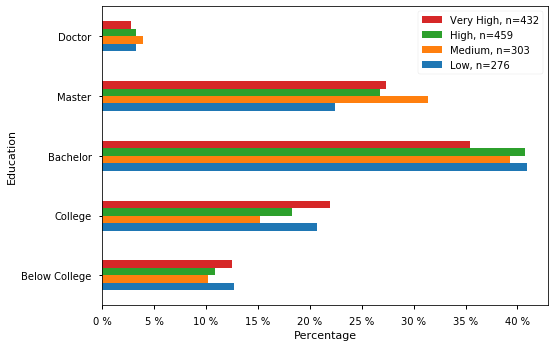

In [7]:
ax1 = df2.plot.barh(legend='reverse',)

ax1.set_xlabel('Percentage')
ax1.set_ylabel('Education')

ax1.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax1.get_xticks()])

In [8]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['Education'], df['RelationshipSatisfaction']))

(13.124643622837368,
 0.36004655228596416,
 12,
 array([[ 31.91836735,  35.04081633,  53.08163265,  49.95918367],
        [ 52.94693878,  58.12653061,  88.05306122,  82.87346939],
        [107.39591837, 117.90204082, 178.60408163, 168.09795918],
        [ 74.72653061,  82.03673469, 124.27346939, 116.96326531],
        [  9.0122449 ,   9.89387755,  14.9877551 ,  14.10612245]]))

In [9]:
df3 = df.groupby('Gender')['MonthlyIncome'].describe()
df3.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588,6687,4696,1129,3037,5082,8712,19973
Male,882,6381,4715,1009,2820,4838,8114,19999


In [10]:
df4 = df.groupby('Education')['MonthlyIncome'].describe()
df4.index = Education
df4.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Below College,170,5641,4485,1009,2693,3849,7170,19973
College,282,6227,4525,1051,3067,4892,6840,19613
Bachelor,572,6517,4817,1081,2760,4762,8808,19926
Master,398,6832,4657,1359,3483,5342,8726,19999
Doctor,48,8278,5061,2127,4731,6203,11732,19586


[Text(0, 0, 'Below College'),
 Text(0, 0, 'College'),
 Text(0, 0, 'Bachelor'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Doctor')]

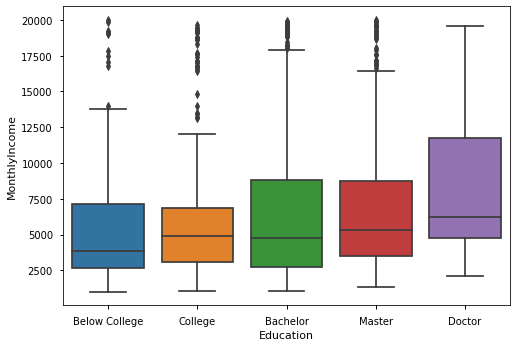

In [11]:
ax2 = sns.boxplot(x='Education', y='MonthlyIncome', data=df)
ax2.set_xticklabels(Education)

In [12]:
df5 = df.pivot_table(values='MonthlyIncome', index='Education', columns='Gender', margins=True)

df5.index = Education + ['All']

df5.style.format('{:.0f}')

Gender,Female,Male,All
Below College,5781,5564,5641
College,6169,6267,6227
Bachelor,6811,6313,6517
Master,6878,6804,6832
Doctor,9241,7463,8278
All,6687,6381,6503


In [13]:
s1 = df['MonthlyIncome'][df['Gender']==str('Male')]
s2 = df['MonthlyIncome'][df['Gender']==str('Female')]

from scipy.stats import ttest_ind
ttest_ind(s1, s2, equal_var=False)

#ei tilastollistesti merkitsevää eroa

Ttest_indResult(statistic=-1.2222619989669412, pvalue=0.22183687764870916)

In [14]:
k1 = df['MonthlyIncome'][df['Education']==1]
k2 = df['MonthlyIncome'][df['Education']==2]
k3 = df['MonthlyIncome'][df['Education']==3]
k4 = df['MonthlyIncome'][df['Education']==4]

from scipy.stats import f_oneway
f_oneway(k1,k2,k3,k4)

#tilastollisesti merkittävä ero

F_onewayResult(statistic=2.83729467535556, pvalue=0.03690891385114674)

In [15]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Overall Satisfaction
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.003681
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.034752
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.013970
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.027213
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.020512
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.701521
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.086054
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.021152
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.000529
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,0.707873


In [16]:
df6 = df.drop(['Attrition', 'Department', 'BusinessTravel', 'Gender',
               'DailyRate', 'DistanceFromHome', 'Education_text', 
               'JobInvolvement_text', 'PerformanceRating_text',
         'EducationField', 'MaritalStatus', 'WorkLifeBalance_text', 
         'HourlyRate', 'EmployeeNumber', 'MonthlyRate',
         'JobRole', 'MonthlyRate', 'RelationshipSatisfaction_text',
         'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 
         'StockOptionLevel', 'TotalWorkingYears', 'OverTime',
         'YearsWithCurrManager', 'YearsInCurrentRole', 'Overall Satisfaction',
        'DailyRateClass', 'Distance Class', 'Age Class'], axis=1)

df6.head()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,2,2,3,2,4,5993,3,1,0,1,6,0
1,49,1,3,2,2,2,5130,4,4,3,3,10,1
2,37,2,4,2,1,3,2090,3,2,3,3,0,0
3,33,4,4,3,1,3,2909,3,3,3,3,8,3
4,27,1,1,3,1,2,3468,3,4,3,3,2,2


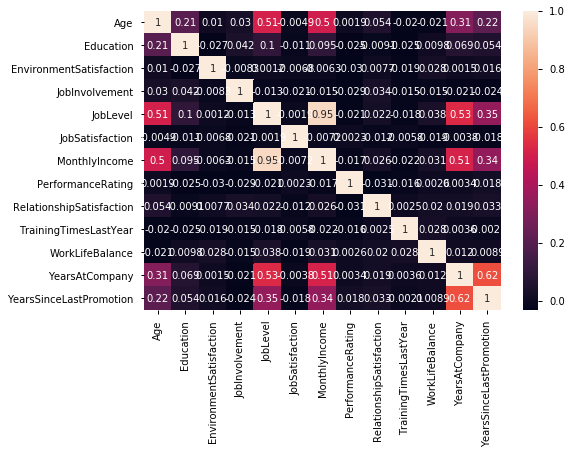

In [17]:
sns.heatmap(df6.corr(), annot=True)

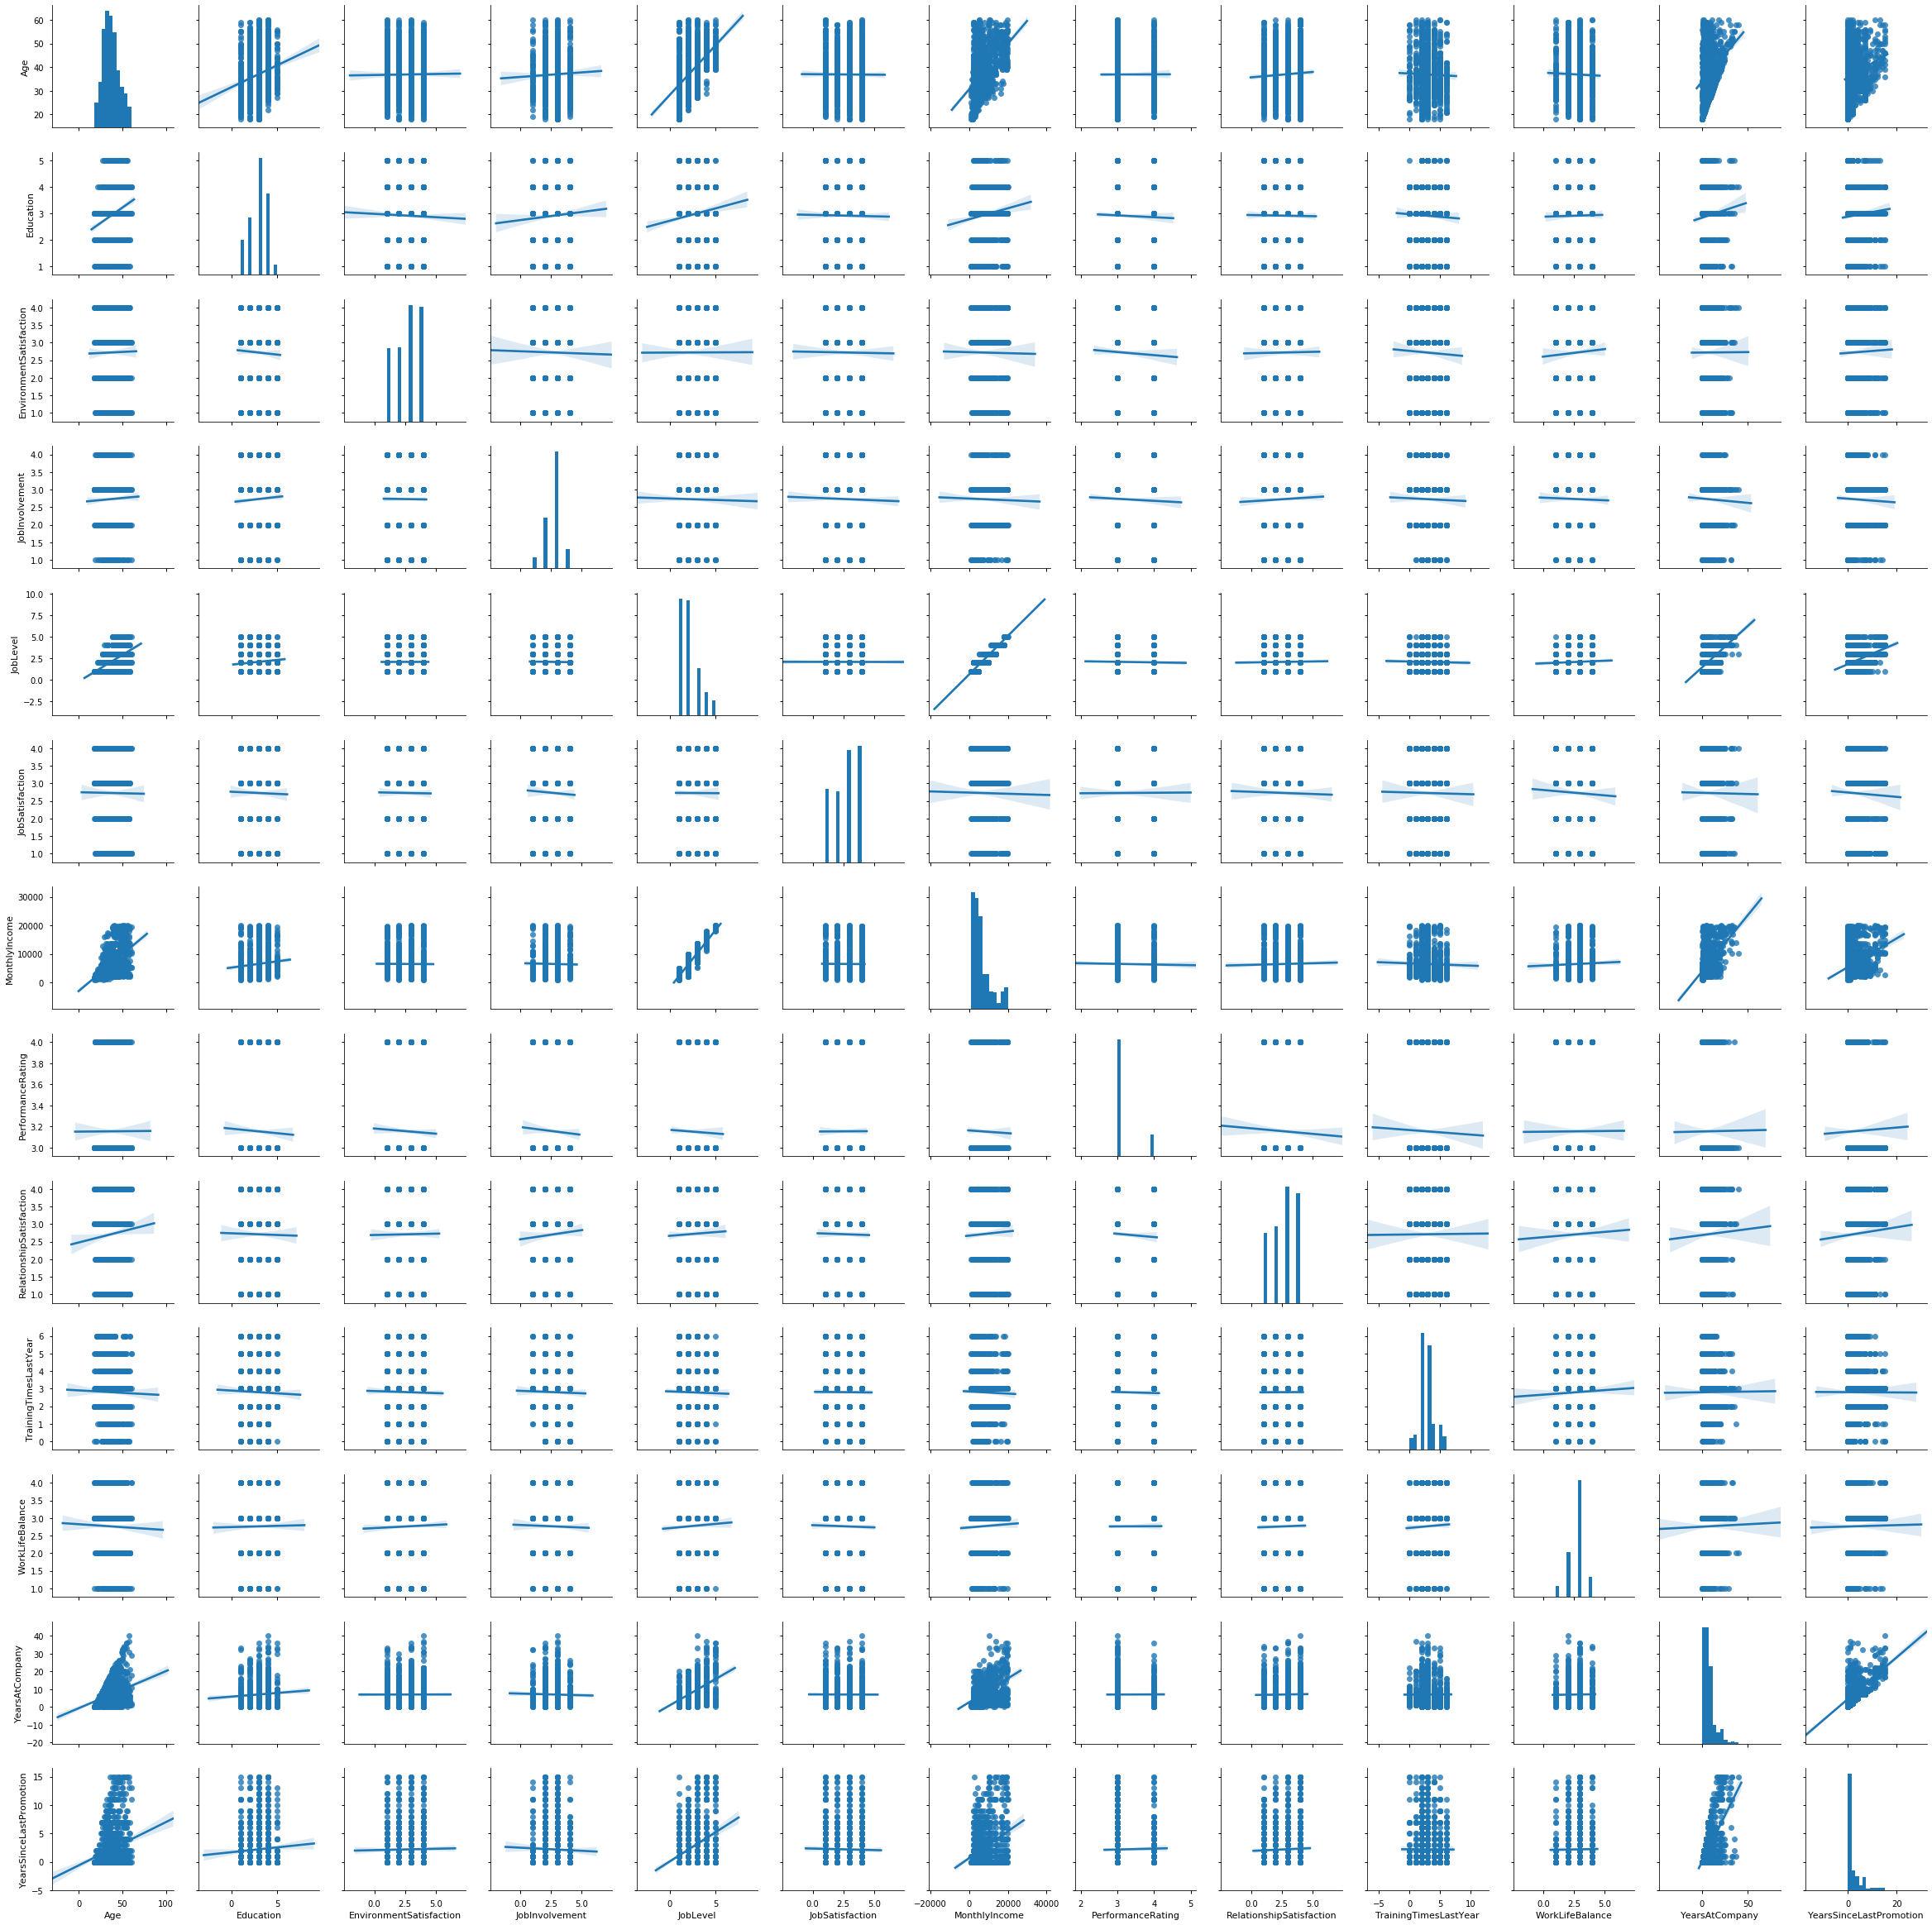

In [18]:
sns.pairplot(df6, kind='reg')

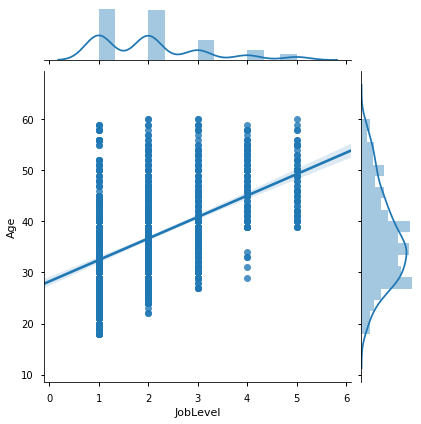

In [19]:
sns.jointplot(x=df6['JobLevel'], y=df6['Age'], kind='reg')

In [20]:
from scipy.stats import pearsonr
for var in df6:
    print(var, pearsonr(df6['JobLevel'], df6[var]))

Age (0.5096042284323837, 5.717946794228011e-98)
Education (0.10158888624850027, 9.549532145483223e-05)
EnvironmentSatisfaction (0.0012116994489139727, 0.9629772848582527)
JobInvolvement (-0.012629882671190591, 0.6284963130597594)
JobLevel (1.0, 0.0)
JobSatisfaction (-0.0019437080267456451, 0.9406447127412433)
MonthlyIncome (0.9502999134798459, 0.0)
PerformanceRating (-0.021222082108857298, 0.41618003785153124)
RelationshipSatisfaction (0.021641510532591505, 0.4070255864854315)
TrainingTimesLastYear (-0.01819055019354933, 0.4858650045680455)
WorkLifeBalance (0.03781774559666621, 0.1472707822667207)
YearsAtCompany (0.5347386873756304, 1.6922383938047865e-109)
YearsSinceLastPromotion (0.35388534696410195, 1.306008036274672e-44)
